# Arbres de décision

Les arbres de décisions (DT) forment une classe d'algorithmes d'apprentissage statistique dédiés à la classification.
La prise de décision est modélisée comme une structure arborescente de tests successifs.

Un arbre de décision comporte :
* Des noeuds internes : les tests à effectuer
* Des feuilles : le décisions prises à la suite des tests

A l'inverse du PPV, les DT sont de "vrais" algorithmes d'apprentissage :
* Il construisent un modèle du jeu de données d'entraînement
* Le modèle est ensuite utilisé pour prendre des décisions

Il y a donc 2 phases bien distincte : **apprentissage**, puis **inférence**

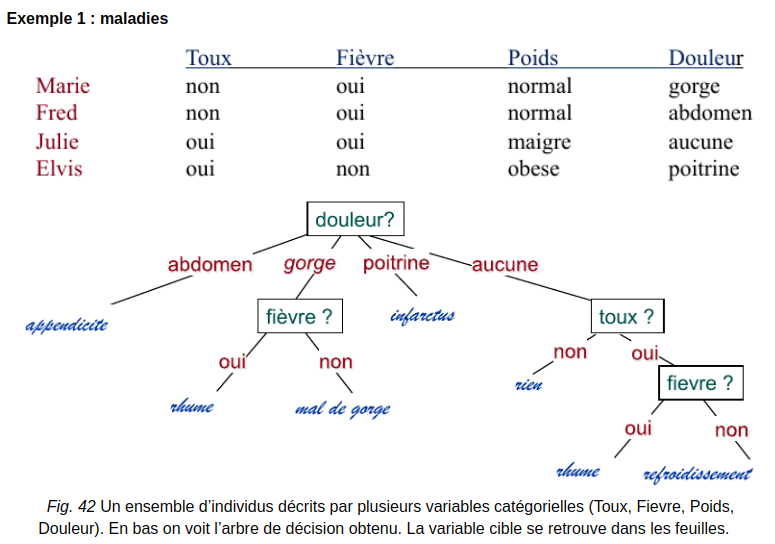

source : http://cedric.cnam.fr/vertigo/Cours/ml2/coursArbresDecision.html

# Construction d'un arbre de décision

Objectif : minimiser le nombre de tests (= attributs testés) à effectuer pour prendre une décision fiable

## Exemple de DT très mal fichu

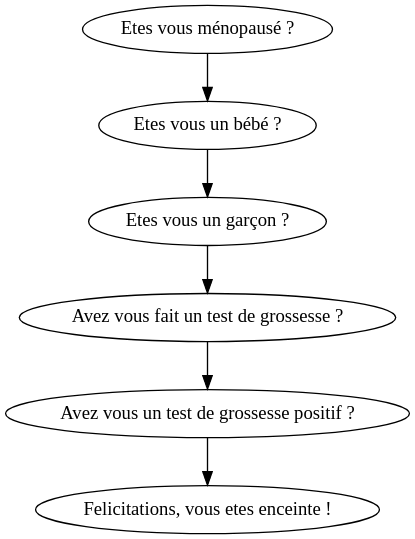

> Question : pourquoi ce DT est-il si mal fichu ?

## DT optimal en présent d'incertitude



**Définition - Gain informationnel**: Mesure de la réduction d'incertitude sur une variable aléatoire X lorsqu'on connait la valeur d'une autre variable aléatoire Y

**Définition - Entropie de shannon**: Mesure l'incertitude portée par une variable aléatoire (discrète)

$$ H(X) = -\sum_x p(X=x)\log p(X=x) $$

* $H(X)=0$ ssi la valeur de $X$ est deterministe -> "on sait tout sur $X$"
* $H(X)\leq \log n$ où $n$ est le nombre de valeurs possibles de $X$
* $H(X) = \log n$ lorsque la distribution de $X$ est uniforme -> "on ne sait rien sur $X$"

Du point de vue théorie de la décision :
* lorsque $H(X)=0$ : on n'a pas besoin de poser de question, $X$ est déjà connue
* lorsque $H(X)$ est maximale : on peut prédire n'importe quelle valeur, la probabilité de se tromper est la même (loi uniforme)

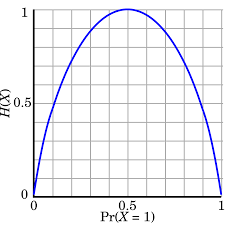
Entropie d'une variable binaire (source Wikipedia)

**Définition - Entropie conditionnelle**: Incertitude qu'il reste sur une VA lorsque la valeur d'une autre VA est connue

$$ H(X|Y=y) = -\sum_x p(X=x|Y=y) \log p(X=x|Y=y) $$

C'est simplement l'entropie de la loi de $X$ conditionnée par $Y$.

Propriétés :
* $H(X|Y) \leq H(X)$ -> connaitre une variable ne peut que réduire l'incertitude sur une autre

Du point de vue théorie de la décision :
* lorsque $H(X|Y) = H(X)$ : Connaitre $Y$ n'apporte aucune connaissance supplémentaire sur $X$
* Plus $H(X) - H(X|Y)$ est grand, plus la connaissance de $Y$ fait progresser la connaissance de $X$

**Gain informationnel**

$$ IG(X,Y) = H(X) - H(X|Y) $$



# Algorithme ID3 (Iterative Dichotomiser 3) *(Quilan 1986)*

BUT : Construire un arbre de décision ou l'esperance du nombre de tests est minimale, autrement dit, poser en moyenne le moins de questions possible


ID3 commence par la racine. Ensuite pour le nœud S en train d’être testé :
* Calculer le gain d’information pour chaque attribut pas encore utilisé,
* Choisir l’attribut a de gain d’information maximal,
* Créer un test (décision) sur cet attribut dans le nœud S et générer les sous-nœuds S1,...Sk correspondant à la partition sur l’attribut choisi a,
* Récurrence sur les nœuds qui viennent d’être crées.

Sortie de la récursivité :
* Tous les éléments de S sont dans la même classe (H(S)=0) : S devient nœud feuille,
* Pas d’attributs non utilisés : nœud feuille sur le classe majoritaire,


ID3 ne trouve pas forcément l'optimum global (*i.e.*, l'arbre le plus petit). L'arbre obtenu est seulement localement optimal, dans le sens où à chaque décision intermédiaire (test) on minimise l'incertitude sur la variable cible. 

> A VOUS DE JOUER : Implémentez une IA optimale pour le jeu de "Qui est-ce ?"

> Montrez qu'ID3 n'est pas globalement optimal. Que faudrait-il faire pour obtenir un algorithme optimal ? Quel en serait le coût ? Expliquez pourquoi une technique de backtracking peut améliorer l'optimalité ID3.

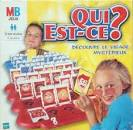

In [2]:
# Qui est-ce ?

import numpy as np

quiestce = np.genfromtxt('quiestce.csv', delimiter=',', dtype=str)
attr = quiestce[0,1:]
noms = quiestce[1:,0]
data = quiestce[1:]
noms,attr,data.shape

(array(['Max', 'Robert', 'Peter', 'Alex', 'Frans', 'Joe', 'Claire', 'Bill',
        'Herman', 'Anne', 'Sam', 'Paul', 'Alfred', 'Charles', 'Richard',
        'Philip', 'George', 'Tom', 'David', 'Bernard', 'Susan', 'Maria',
        'Eric', 'Anita'], dtype='<U18'),
 array(['Cheveux bruns', 'Cheveux chatains', 'Roux', 'Blond',
        'Cheveux blancs', 'Cheveux frisés', 'Cheveux longs', 'Chauve',
        'Femme', 'Lunettes', 'Chapeau', "Boucles d'oreilles", 'Moustache',
        'Barbe', 'Sourcils bruns', 'Yeux bleus', 'Gros Nez',
        'Grosses Levres', 'Fossette', 'Rides au front', 'Pomettes rouges',
        'Couettes'], dtype='<U18'),
 (24, 23))

In [15]:
# Une IA stupide ...

x = input("Est-ce que c'est une fille ?")
x = 'X' if x in ['oui', 'o', 'yes', 'y'] else ''
reste = data[data[:,list(attr).index('Femme')+1]==x]
print("C'est {} !!".format(np.random.choice(reste[:,0])))



Est-ce que c'est une fille ? non


C'est Alfred !!


In [7]:
# Une IA très très naïve ...

reste = data
for i,a in enumerate(attr):
    x = input(a + " ?").lower()
    x = 'X' if x in ['oui', 'o', 'yes', 'y'] else ''
    reste = reste[reste[:,i+1]==x]
    if(len(reste) == 0):
        print("Tu te moques de moi ?")
        break
    if(len(reste) == 1):
        print("C'est {} !".format(reste[0,0]))
        print("(gagné en {} étapes...)".format(i))
        break
    print("reste {} personnes".format(len(reste)))
        


Cheveux bruns ? non


reste 19 personnes


Cheveux chatains ? non


reste 15 personnes


Roux ? oui


reste 5 personnes


Blond ? non


reste 5 personnes


Cheveux blancs ? non


reste 5 personnes


Cheveux frisés ? non


reste 3 personnes


Cheveux longs ? non


reste 2 personnes


Chauve ? non


C'est Claire !
(gagné en 7 étapes...)


In [24]:
# ID3 "en ligne"

reste = data
for step in range(len(attr)):
    r = reste[:,1:]=='X'
    n = r.sum(axis=0)
    p = n/len(reste)
    p = np.where(p*(1-p)<1e-5, 1e-5, p)
    gain = -p*np.log(p) -(1-p)*np.log(1-p)
    i = gain.argmax()
    a = attr[i]
    x = input(a + " ?").lower()
    x = 'X' if x in ['oui', 'o', 'yes', 'y'] else ''
    reste = reste[reste[:,i+1]==x]
    if(len(reste) == 0):
        print("Tu te moques de moi ?")
        break
    if(len(reste) == 1):
        print("C'est {} !".format(reste[0,0]))
        print("(gagné en {} étapes...)".format(step+1))
        break
    print("reste {} personnes".format(len(reste)))

Fossette ? oui


reste 8 personnes


Blond ? no


reste 5 personnes


Cheveux chatains ? non


reste 3 personnes


Cheveux bruns ? non


reste 2 personnes


Lunettes ? oui


C'est Paul !
(gagné en 5 étapes...)


> A vous de jouer : transformez l'algorithme pour qu'il n'y ait plus besoin du jeu de données lors de l'inférence, en séparant la phase d'entraînement (construction de l'arbre) de la phase d'inférence (tests successifs)